slope_left: 1.89
slope_right: -1.6



C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


640


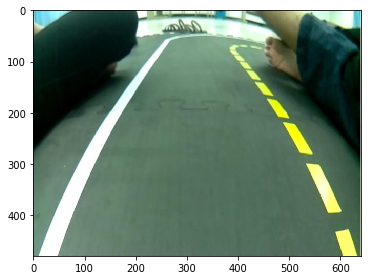

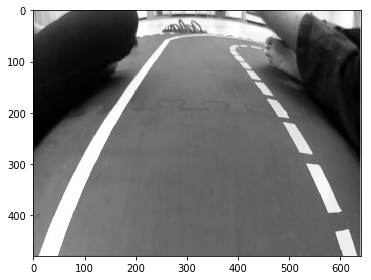

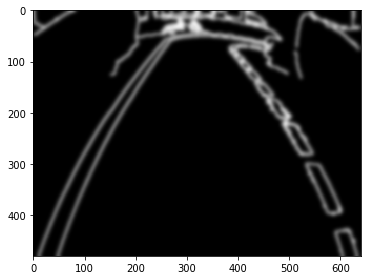

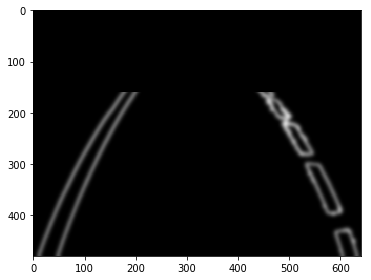

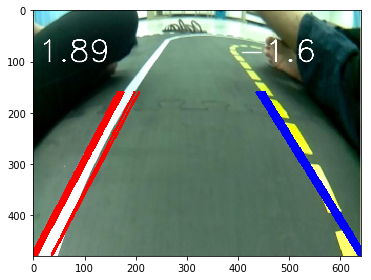

In [116]:
image = imread('./dataset/original/30.jpg')
frame = cv2.resize(image,(640, 480))
gray=cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(image,100,200)
edges = dilation(edges, square(3))
edges[:,637:640] = 0 
edges = ndi.gaussian_filter(edges,4)

height=image.shape[0]
width=image.shape[1]
region_of_interest_vertices = [   
    (0, height),
    (0, (height/3)),
#     ((width/5), (height/3)),

#     (width-(width/5), (height/3)),
    (width, (height/3)),
    (width, height)]
crop = region_of_interest(edges,np.array([region_of_interest_vertices], np.int32))


# copyi = copy.deepcopy(image)
lines = cv2.HoughLinesP(crop,rho = 1,theta = 1*np.pi/180,threshold = 350,minLineLength = 10,maxLineGap = 250)
# print(lines)
font = cv2.FONT_HERSHEY_SIMPLEX
l=[]
r=[]
# Draw lines on the image
if(lines is not None) :
    for line in lines:  
        x1, y1, x2, y2 = line[0]
        if(slope((x1,y1),(x2,y2),width)):
            if(x1 < int(width/2)):
                l.append(slope((x1,y1),(x2,y2),width))
                cv2.line(frame, (x1, y1), (x2, y2), (255, 0, 0), 3)
            else:
                r.append(slope((x1,y1),(x2,y2),width))
                cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 3)
             
    if(l):
        if(len(l)):
            slope_left = round(sum(l)/len(l),2)
            cv2.putText(frame,str(slope_left),(10,100), font, 2,(255,255,255),2,cv2.LINE_AA)
            print('slope_left:', slope_left)
            
    if(r):
        if(len(r)):
            slope_right = round(sum(r)/len(r),2)
            cv2.putText(frame,str(slope_right),(400,100), font, 2,(255,255,255),2,cv2.LINE_AA)
            print('slope_right:', slope_right)        
    print()
    
# Show result
show=[]
show.append(image)
show.append(gray)
show.append(edges)
show.append(crop)
show.append(frame)
# imshow_collection(show)

for f in show:
    plt.figure()
    imshow(f)
print(width)

In [70]:
import cv2
import numpy as np
import time
from skimage.io import imshow,imread,imsave,imshow_collection
from scipy import ndimage as ndi
from skimage import feature
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from skimage.morphology import square,dilation
import copy
from scipy import ndimage as ndi

In [71]:
def region_of_interest(img, vertices):   
    mask = np.zeros_like(img)
    match_mask_color = (255,)
    cv2.fillPoly(mask, vertices, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def slope(start,end,width):
    x1=start[0]
    x2=end[0]
    y1=width-start[1]
    y2=width-end[1]
#     print('(x2-x1):',(x2-x1))
    if (x2-x1) != 0:
        m=(y2-y1)/(x2-x1)        
        return m

In [123]:
url='../video/test.h264'
cap = cv2.VideoCapture(url)
count=0
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv2.resize(frame,(640, 480))
#     gray=cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(frame,100,200)
    edges = dilation(edges, square(3))
    edges[:,637:640] = 0 
    edges = ndi.gaussian_filter(edges,4)

    height=frame.shape[0]
    width=frame.shape[1]
    region_of_interest_vertices = [   
        (0, height),
        (0, (height/3)),
    #     ((width/5), (height/3)),
    #     (width-(width/5), (height/3)),
        (width, (height/3)),
        (width, height)]
    
    crop = region_of_interest(edges,np.array([region_of_interest_vertices], np.int32))


#     copyi = copy.deepcopy(image)
    lines = cv2.HoughLinesP(crop,rho = 1,theta = 1*np.pi/180,threshold = 350,minLineLength = 10,maxLineGap = 250)
    # print(lines)
    font = cv2.FONT_HERSHEY_SIMPLEX
    l=[]
    r=[]
    # Draw lines on the image
    if(lines is not None) :
        for line in lines:  
            x1, y1, x2, y2 = line[0]
            if(slope((x1,y1),(x2,y2),width)):
                if(x1 < int(width/2)):
                    l.append(slope((x1,y1),(x2,y2),width))
                    cv2.line(frame, (x1, y1), (x2, y2), (255, 0, 0), 3)
                else:
                    r.append(slope((x1,y1),(x2,y2),width))
                    cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 3)

        if(len(l)):
            slope_left = round(sum(l)/len(l),2)                
        else:
            slope_left = 0
        cv2.putText(frame,str(slope_left),(10,100), font, 2,(255,255,255),2,cv2.LINE_AA)
        print('slope_left:', slope_left)
        
        if(len(r)):
            slope_right = round(sum(r)/len(r),2)
        else:
            slope_right = 0
        cv2.putText(frame,str(slope_right),(400,100), font, 2,(255,255,255),2,cv2.LINE_AA)
        print('slope_right:', slope_right) 
        print('slope:', slope_right+slope_left) 
        print()           
            
    
#     frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):        
        break

cap.release()
cv2.destroyAllWindows()
    

slope_left: 1.85
slope_right: -1.63
slope: 0.2200000000000002

slope_left: 1.74
slope_right: -1.6
slope: 0.1399999999999999

slope_left: 1.86
slope_right: -1.6
slope: 0.26

slope_left: 1.81
slope_right: -1.6
slope: 0.20999999999999996

slope_left: 1.92
slope_right: -1.6
slope: 0.31999999999999984

slope_left: 1.91
slope_right: -1.61
slope: 0.2999999999999998

slope_left: 1.88
slope_right: -1.6
slope: 0.2799999999999998

slope_left: 1.84
slope_right: -1.6
slope: 0.24

slope_left: 1.86
slope_right: -1.6
slope: 0.26

slope_left: 1.9
slope_right: -1.6
slope: 0.2999999999999998

slope_left: 1.9
slope_right: -1.6
slope: 0.2999999999999998

slope_left: 1.9
slope_right: -1.6
slope: 0.2999999999999998

slope_left: 1.82
slope_right: -1.6
slope: 0.21999999999999997

slope_left: 1.91
slope_right: -1.6
slope: 0.30999999999999983

slope_left: 1.93
slope_right: -1.6
slope: 0.32999999999999985

slope_left: 1.92
slope_right: -1.6
slope: 0.31999999999999984

slope_left: 1.94
slope_right: -1.6
slope: 0.3

slope_right: 0
slope: 1.0

slope_left: 1.0
slope_right: 0
slope: 1.0

slope_left: 1.0
slope_right: 0
slope: 1.0

slope_left: 0.51
slope_right: 0
slope: 0.51

slope_left: 0.53
slope_right: 0
slope: 0.53

slope_left: 0.65
slope_right: 0
slope: 0.65

slope_left: 0.47
slope_right: 0
slope: 0.47

slope_left: 0.71
slope_right: 0
slope: 0.71

slope_left: 0.77
slope_right: 0
slope: 0.77

slope_left: 0.49
slope_right: 0
slope: 0.49

slope_left: 0.68
slope_right: 0
slope: 0.68

slope_left: 0.49
slope_right: 0
slope: 0.49

slope_left: 0.44
slope_right: 0
slope: 0.44

slope_left: 0.42
slope_right: 0
slope: 0.42

slope_left: 0.38
slope_right: 0
slope: 0.38

slope_left: 0.37
slope_right: 0
slope: 0.37

slope_left: 0.4
slope_right: 0
slope: 0.4

slope_left: 0.35
slope_right: 0
slope: 0.35

slope_left: 0.37
slope_right: 0
slope: 0.37

slope_left: 0.31
slope_right: 0
slope: 0.31

slope_left: 0.4
slope_right: 0
slope: 0.4

slope_left: 0.35
slope_right: 0
slope: 0.35

slope_left: 0.35
slope_right: 0
slop

slope_left: 0.66
slope_right: 0
slope: 0.66

slope_left: 0.48
slope_right: 0
slope: 0.48

slope_left: 0.44
slope_right: 0
slope: 0.44

slope_left: 0.49
slope_right: 0
slope: 0.49

slope_left: 0.51
slope_right: 0
slope: 0.51

slope_left: 0.52
slope_right: 0
slope: 0.52

slope_left: 0.54
slope_right: 0
slope: 0.54

slope_left: 0.59
slope_right: 0
slope: 0.59

slope_left: 0.58
slope_right: 0
slope: 0.58

slope_left: 0.56
slope_right: 0
slope: 0.56

slope_left: 0.6
slope_right: 0
slope: 0.6

slope_left: 0.63
slope_right: 0
slope: 0.63

slope_left: 0.64
slope_right: 0
slope: 0.64

slope_left: 0.63
slope_right: 0
slope: 0.63

slope_left: 0.64
slope_right: 0
slope: 0.64

slope_left: 0.62
slope_right: 0
slope: 0.62

slope_left: 0.62
slope_right: 0
slope: 0.62

slope_left: 0.62
slope_right: 0
slope: 0.62

slope_left: 0.64
slope_right: 0
slope: 0.64

slope_left: 0.66
slope_right: 0
slope: 0.66

slope_left: 0.63
slope_right: 0
slope: 0.63

slope_left: 0.68
slope_right: 0
slope: 0.68

slope_left: 